In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tcn import TCN # main library
import math
from sklearn.preprocessing import RobustScaler
#from keras.initializers import  glorot_normal, RandomUniform
#from keras import optimizers,regularizers

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model 
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
df = pd.read_csv("station_bike _Old.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.set_index("timestamp")
#df.head()

df["hour"] = df.index.hour
df["day_of_month"] = df.index.day
df["day_of_week"]  = df.index.dayofweek
df["month"] = df.index.month

training_data_len = math.ceil(len(df) * 0.9) # taking 90% of data to train and 10% of data to test
testing_data_len = len(df) - training_data_len

time_steps = 24
train, test = df.iloc[0:training_data_len], df.iloc[(training_data_len-time_steps):len(df)]
print(df.shape, train.shape, test.shape)

train_trans = train[['t1','t2', 'hum', 'wind_speed']].to_numpy()
test_trans = test[['t1','t2', 'hum', 'wind_speed']].to_numpy()

scaler = RobustScaler() # Handles outliers
train.loc[:, ['t1','t2','hum', 'wind_speed']]=scaler.fit_transform(train_trans)
test.loc[:, ['t1','t2', 'hum', 'wind_speed']]=scaler.fit_transform(test_trans)

train['cnt'] = scaler.fit_transform(train[['cnt']])
test['cnt'] = scaler.fit_transform(test[['cnt']])

from tqdm import tqdm_notebook as tqdm

#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in tqdm(range(len(train) - time_steps)):
    x_train.append(train.drop(columns='cnt').iloc[i:i + time_steps].to_numpy())
    y_train.append(train.loc[:,'cnt'].iloc[i + time_steps])

#Convert x_train and y_train to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

#Create the x_test and y_test data sets
x_test = []
y_test = df.loc[:,'cnt'].iloc[training_data_len:len(df)]

for i in tqdm(range(len(test) - time_steps)):
    x_test.append(test.drop(columns='cnt').iloc[i:i + time_steps].to_numpy())
    # y_test.append(test.loc[:,'cnt'].iloc[i + time_steps])

#Convert x_test and y_test to numpy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)

# All 12 columns of the data
print('Train size:')
print(x_train.shape, y_train.shape)
print('Test size:')
print(x_test.shape, y_test.shape)

(160, 13) (144, 13) (40, 13)


C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

  0%|          | 0/120 [00:00<?, ?it/s]

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:46: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/16 [00:00<?, ?it/s]

Train size:
(120, 24, 12) (120,)
Test size:
(16, 24, 12) (16,)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_4 (TCN)                  (None, 24, 25)            14950     
_________________________________________________________________
dropout_4 (Dropout)          (None, 24, 25)            0         
_________________________________________________________________
tcn_5 (TCN)                  (None, 25)                15600     
_________________________________________________________________
dropout_5 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 30,576
Trainable params: 30,576
Non-trainable params: 0
_________________________________________________________________
Train...
Train on 108 samples, validate on 12 samples
Epoch 1/120
108/108 [==============================] - 5s 51ms

108/108 [==============================] - 0s 1ms/sample - loss: 0.1468 - val_loss: 0.1782
Epoch 70/120
108/108 [==============================] - 0s 1ms/sample - loss: 0.1572 - val_loss: 0.1407
Epoch 71/120
108/108 [==============================] - 0s 1ms/sample - loss: 0.1312 - val_loss: 0.1312
Epoch 72/120
108/108 [==============================] - 0s 1ms/sample - loss: 0.1340 - val_loss: 0.1285
Epoch 73/120
108/108 [==============================] - 0s 1ms/sample - loss: 0.1578 - val_loss: 0.1358
Epoch 74/120
108/108 [==============================] - 0s 1ms/sample - loss: 0.1430 - val_loss: 0.1428
Epoch 75/120
108/108 [==============================] - 0s 1ms/sample - loss: 0.1574 - val_loss: 0.1067
Epoch 76/120
108/108 [==============================] - 0s 1ms/sample - loss: 0.1490 - val_loss: 0.1300
Epoch 77/120
108/108 [==============================] - 0s 1ms/sample - loss: 0.1432 - val_loss: 0.1569
Epoch 78/120
108/108 [==============================] - 0s 1ms/sample - loss:

Text(0, 0.5, 'mse score')

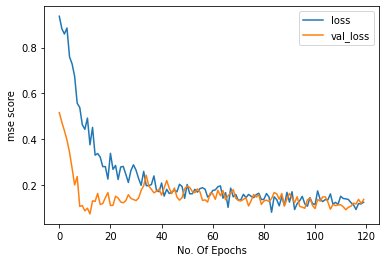

In [5]:
#init = glorot_normal(seed=None) # 給 LSTM
#init_d = RandomUniform(minval=-0.05, maxval=0.05) # 給 Dense layer
#nadam = optimizers.Nadam(lr=0.002,clipvalue=0.5)
from tensorflow.keras.initializers import RandomUniform
init_d = RandomUniform(minval=-0.05, maxval=0.05) # 給 Dense layer
model = Sequential()
model.add(TCN(input_shape=(x_train.shape[1],x_train.shape[2]),
        kernel_size=3,
        nb_filters=25,
        nb_stacks=1,
        dilations=(1, 2, 4, 8),
        kernel_initializer='glorot_uniform',
        use_skip_connections=True,
        use_batch_norm=False,
        use_weight_norm=False,
        use_layer_norm=True,
        dropout_rate = 0.05,
        return_sequences=True
        ))
model.add(Dropout(0.5))
model.add(TCN(
        kernel_size=3,
        nb_filters=25,
        nb_stacks=1,
        dilations=(1, 2, 4, 8),
        kernel_initializer='glorot_uniform',
        use_skip_connections=True,
        use_batch_norm=False,
        use_weight_norm=False,
        use_layer_norm=True,
        dropout_rate = 0.05,
        return_sequences=False
        ))  
model.add(Dropout(0.3))
model.add(Dense(1,kernel_initializer=init_d))  
model.summary()

print('Train...')
model.compile(optimizer = "nadam" , loss="mse")
history = model.fit(x_train, y_train, epochs=120, batch_size=12, validation_split=0.1, shuffle=True)
#Save Model
model.save('TCN_model_OLD.h5')  # creates a HDF5 file 
del model

custom_ob = {'TCN': TCN}
# model = load_model('TCN_model_1.h5', custom_objects=custom_ob)
model = load_model('TCN_model_OLD.h5', custom_objects=custom_ob)
print('Load Success')

import time
t1 = time.time()
y_pred = model.predict(x_test)
t2 = time.time()
print('Predict time: ',t2-t1)
y_pred = scaler.inverse_transform(y_pred)#Undo scaling

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ',rmse_lstm)

mae = mean_absolute_error(y_test, y_pred)
print('MAE: ',mae)

r2 =  r2_score(y_test, y_pred)
print('R-square: ',r2)

n = len(y_test)
p = 12
Adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('Adj R-square: ',Adj_r2)

plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.legend(loc="best")
plt.xlabel("No. Of Epochs")
plt.ylabel("mse score")